 ## TAREA 2 

### INTRODUCCION Y PREGUNTA SMART

PREGUNTA SMART

¿Qué características sociodemográficas y de comportamiento de pago histórico de los asociados de Coomeva Cooperativa están más asociadas con la probabilidad de pago o impago, a partir del análisis exploratorio de datos?

## JUSTIFICACION VARIABLE INGRESO

En el marco del análisis exploratorio de datos, la variable ingreso se considera un pilar fundamental para comprender y predecir el comportamiento de pago o impago de los asociados de Coomeva Cooperativa. Su relevancia radica en que funciona como el principal indicador de la capacidad financiera de un individuo para cumplir con sus obligaciones. Un ingreso estable y suficiente no solo reduce la probabilidad de incumplimiento, sino que también es una pieza clave en la evaluación del riesgo crediticio y en el modelado predictivo. En este sentido, se espera que el ingreso muestre una correlación positiva con la probabilidad de pago, ya que un mayor flujo de fondos por parte del asociado le proporciona la liquidez necesaria para honrar sus compromisos. Por lo tanto, el análisis de esta variable es vital para segmentar a los asociados, determinar perfiles de riesgo y optimizar las políticas de crédito de la cooperativa.


# Análisis univariado en Python

In [30]:
## Importamos las librerias necesarias ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
## Leemos la Base_Demografica de asociados ##

df = pd.read_csv("C:/Users/Usuario/Desktop/Data Science/AED/Proyecto/Data/Base_Demografica.csv", sep=",")

## información del df ##

print(list(df.columns))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19316\2140587471.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Usuario/Desktop/Data Science/AED/Proyecto/Data/Base_Demografica.csv", sep=",")


['str_periodo', 'codigo', 'fecha_ingreso', 'estado', 'nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL', 'fecha_retiro', 'oficina', 'tipo_vinculacion', 'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo', 'personas_a_cargo_menores_18', 'sexo', 'estrato', 'tipo_vivienda', 'nombre_tipo_vivienda', 'doc_corredor', 'nombre_promotor', 'nivel_academico', 'nombre_nivel_academico', 'fecha_nacimiento', 'ingresos', 'fecha_ingresos', 'egresos', 'titulo_obtenido', 'nombre_titulo_obtenido', 'ocupacion', 'nombre_ocupacion', 'ptaje_acierta', 'saldo_aportes', 'ind_inactivo', 'ingresos_deflactados', 'fecha_ingresos_deflactados', 'segmento_ingresos_vs_antiguedad', 'segmento_ciclo_de_vida', 'descripcion_oficina', 'regional', 'zona', 'dtm_fecha_insercion', 'dtm_fecha_creacion', 'edad', 'rango_edad', 'antiguedad_meses', 'antiguedad_anios', 'rango_antiguedad', 'rango_ingreso', 'rango_menores', 'rango_aportes', 'codigo_area_de_conocimiento', 'descripcion_area_de_conocimiento', 'circulo_pr

In [32]:
df.shape

(268047, 125)

In [33]:
print(list(df.dtypes))

[dtype('int64'), dtype('float64'), dtype('O'), dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'

In [34]:
print(list(df.isnull().sum()))

[0, 0, 0, 0, 0, 4301, 1721, 240915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 9, 18, 148378, 17326, 0, 684, 0, 0, 67, 0, 24689, 24689, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 67, 23973, 23973, 23973, 1198, 1198, 1, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582, 37582]


In [35]:
## Escogemos las columnas necesarias ##

df = df[['nombre_estado','EDAD_CARTERA_INICIAL','EDAD_CARTERA_FINAL','nombre_tipo_vinculacion','estado_civil','personas_a_cargo','estrato',
         'nombre_tipo_vivienda','nombre_nivel_academico','ingresos','egresos','nombre_ocupacion','ptaje_acierta','edad','regional',
         'antiguedad_anios','suma_productos']]

df.head(5)

,nombre_estado,EDAD_CARTERA_INICIAL,EDAD_CARTERA_FINAL,nombre_tipo_vinculacion,estado_civil,personas_a_cargo,estrato,nombre_tipo_vivienda,nombre_nivel_academico,ingresos,egresos,nombre_ocupacion,ptaje_acierta,edad,regional,antiguedad_anios,suma_productos
0,Inactivo,6.0,6.0,Mayor 60,Casado,1,4,Propia,Profesional,2250000.0,NaN,Independiente,0,97,Bogota,26,2.0
1,Activo Normal,0.0,0.0,Mayor 60,Casado,0,5,Propia,Profesional,4500000.0,NaN,Independiente,0,94,Cali,55,5.0
2,Activo Cobranza Interna,0.0,1.0,Mayor 60,Casado,2,6,Desconocida,Profesional,4500000.0,NaN,Asalariado,0,93,Caribe,28,3.0
3,Activo Normal,0.0,0.0,Mayor 60,Casado,0,4,Propia,Ninguno,0.0,0.0,Pensionado - Jubilado,806,96,Bogota,13,0.0
4,Inactivo,5.0,5.0,Mayor 60,Casado,0,5,Propia,Ninguno,10500000.0,NaN,Asalariado,695,84,Medellin,12,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268047 entries, 0 to 268046
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            268047 non-null  object 
 1   EDAD_CARTERA_INICIAL     263746 non-null  float64
 2   EDAD_CARTERA_FINAL       266326 non-null  float64
 3   nombre_tipo_vinculacion  268047 non-null  object 
 4   estado_civil             268047 non-null  object 
 5   personas_a_cargo         268047 non-null  int64  
 6   estrato                  268047 non-null  object 
 7   nombre_tipo_vivienda     268047 non-null  object 
 8   nombre_nivel_academico   268047 non-null  object 
 9   ingresos                 268038 non-null  float64
 10  egresos                  119669 non-null  float64
 11  nombre_ocupacion         268047 non-null  object 
 12  ptaje_acierta            268047 non-null  int64  
 13  edad                     268047 non-null  int64  
 14  regi

In [37]:
## Vemos valores nulos x columna ##
valor_nulos = df.isna().sum()
valor_nulos

nombre_estado                   0
EDAD_CARTERA_INICIAL         4301
EDAD_CARTERA_FINAL           1721
nombre_tipo_vinculacion         0
estado_civil                    0
personas_a_cargo                0
estrato                         0
nombre_tipo_vivienda            0
nombre_nivel_academico          0
ingresos                        9
egresos                    148378
nombre_ocupacion                0
ptaje_acierta                   0
edad                            0
regional                        0
antiguedad_anios                0
suma_productos                  1
dtype: int64

Según el resultado anterior, cada columna tiene 270.507 filas de datos, y existen cinco filas que contienen valores perdidos:

"EDAD_CARTERA_INICIAL" -- TIENE 4.301 valores perdidos

"EDAD_CARTERA_FINAL"   -- TIENE 1.721 valores perdidos

"ingresos"             -- TIENE 9 valores perdidos

"egresos"                -- TIENE 148.378 valores perdidos

"suma_producto" --- Tiene 1 valor perdido


## Manejo valores perdidos 

In [38]:
## Columna edad cartera inicial y edad cartera final ##

## Si no tiene edad de cartera, según el dominio de la facturacion de la empresa, se encontró que el asociado en cuestión no tenia nada
## Facturado, por lo tanto se decide rellenar los vacios con 0

df['EDAD_CARTERA_INICIAL'] = df['EDAD_CARTERA_INICIAL'].fillna(0)
df['EDAD_CARTERA_FINAL'] = df['EDAD_CARTERA_FINAL'].fillna(0)

print('valores unicos edad inicial:',df['EDAD_CARTERA_INICIAL'].unique()) ## Para validar que el cambio quedo hecho
print('valores unicos edad final:',df['EDAD_CARTERA_FINAL'].unique()) ## Para validar que el cambio quedo hecho

valores unicos edad inicial: [6. 0. 5. 1. 3. 4. 2. 7.]
valores unicos edad final: [6. 0. 1. 5. 4. 3. 7. 2.]


In [39]:
## Columna egresos ##

## Al validar que tiene tantos registros nulos (55% de las filas) se decide eliminar esta columna del df #3

df = df.drop(columns="egresos")
df.columns ## validar que haya quedado la eliminacion

Index(['nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL',
       'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo',
       'estrato', 'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos'],
      dtype='object')

In [40]:
## Columna suma producto ## Al ser solo 1 valor, se decide rellenar con el promedio de la columna

df['suma_productos'] = df['suma_productos'].fillna(int(df['suma_productos'].mean()))
df['suma_productos'].unique() ## validar el resultado

array([ 2.,  5.,  3.,  0.,  1.,  4.,  9.,  7.,  6., 10.,  8., 11., 12.,
       13., 14., 16., 15., 19., 18., 17., 20., 23., 21., 22., 25.])

In [41]:
## columna ingresos ##  --- Variable de interes para el analisis univariado ##
## Al validar que no son muchos los registros nulos, se decide eliminar las filas nulas ##

df['ingresos'] = df['ingresos'].dropna()
df.head(5)

,nombre_estado,EDAD_CARTERA_INICIAL,EDAD_CARTERA_FINAL,nombre_tipo_vinculacion,estado_civil,personas_a_cargo,estrato,nombre_tipo_vivienda,nombre_nivel_academico,ingresos,nombre_ocupacion,ptaje_acierta,edad,regional,antiguedad_anios,suma_productos
0,Inactivo,6.0,6.0,Mayor 60,Casado,1,4,Propia,Profesional,2250000.0,Independiente,0,97,Bogota,26,2.0
1,Activo Normal,0.0,0.0,Mayor 60,Casado,0,5,Propia,Profesional,4500000.0,Independiente,0,94,Cali,55,5.0
2,Activo Cobranza Interna,0.0,1.0,Mayor 60,Casado,2,6,Desconocida,Profesional,4500000.0,Asalariado,0,93,Caribe,28,3.0
3,Activo Normal,0.0,0.0,Mayor 60,Casado,0,4,Propia,Ninguno,0.0,Pensionado - Jubilado,806,96,Bogota,13,0.0
4,Inactivo,5.0,5.0,Mayor 60,Casado,0,5,Propia,Ninguno,10500000.0,Asalariado,695,84,Medellin,12,0.0


In [42]:
## Validamos los cambios realizados de manera general ##

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268047 entries, 0 to 268046
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            268047 non-null  object 
 1   EDAD_CARTERA_INICIAL     268047 non-null  float64
 2   EDAD_CARTERA_FINAL       268047 non-null  float64
 3   nombre_tipo_vinculacion  268047 non-null  object 
 4   estado_civil             268047 non-null  object 
 5   personas_a_cargo         268047 non-null  int64  
 6   estrato                  268047 non-null  object 
 7   nombre_tipo_vivienda     268047 non-null  object 
 8   nombre_nivel_academico   268047 non-null  object 
 9   ingresos                 268038 non-null  float64
 10  nombre_ocupacion         268047 non-null  object 
 11  ptaje_acierta            268047 non-null  int64  
 12  edad                     268047 non-null  int64  
 13  regional                 268047 non-null  object 
 14  anti

## ANALISIS UNVARIADO -- VARIABLE INGRESO

In [43]:
## 1. Estadisticas descriptivas ##


df['ingresos'] = df['ingresos'].round(0) / 1000000
df['ingresos'].describe()

count    268038.000000
mean          6.598956
std          56.502130
min           0.000000
25%           2.250000
50%           4.000000
75%           7.093009
max        9259.171000
Name: ingresos, dtype: float64

In [44]:
## valores mas altos ##

n_valores_altos = df['ingresos'].nlargest(100)
n_valores_altos

65427     9259.171000
157019    9100.000000
242583    9100.000000
67559     8992.560423
4992      8700.000000
             ...     
22527      233.831500
216930     229.058620
27802      228.000000
134631     227.116731
27811      226.886833
Name: ingresos, Length: 100, dtype: float64

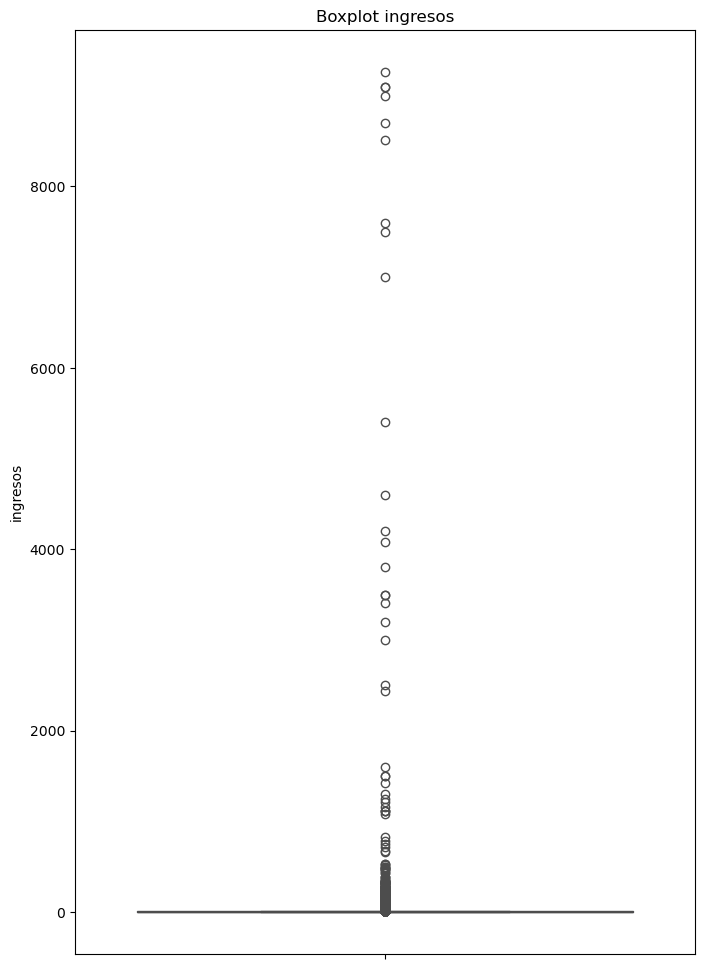

In [45]:
## Graficar variable ingreso ##

plt.figure(figsize=(8,12))
sns.boxplot(df['ingresos'],color='blue')
plt.title('Boxplot ingresos')
plt.show()

## Manejo de outliers 

Validando el boxplot de la variable ingresos, nos encontramos que hay una significativa cantidad de outliers, por lo cual se le dara tratamiento a esto con el metodo de IQR -- Rango intercuartilico

In [46]:
## Rango intercuartilico ##

Q1 = df['ingresos'].quantile(0.25)
Q3 = df['ingresos'].quantile(0.75)
IQR = Q3 - Q1

## Definimos los limites inferior y superior ##

limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

## filtramos los datos para eliminar los outliers ##

df_sin_outliers = df[(df['ingresos']>= limite_inferior) & (df['ingresos'] <= limite_superior)]
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246746 entries, 0 to 268045
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            246746 non-null  object 
 1   EDAD_CARTERA_INICIAL     246746 non-null  float64
 2   EDAD_CARTERA_FINAL       246746 non-null  float64
 3   nombre_tipo_vinculacion  246746 non-null  object 
 4   estado_civil             246746 non-null  object 
 5   personas_a_cargo         246746 non-null  int64  
 6   estrato                  246746 non-null  object 
 7   nombre_tipo_vivienda     246746 non-null  object 
 8   nombre_nivel_academico   246746 non-null  object 
 9   ingresos                 246746 non-null  float64
 10  nombre_ocupacion         246746 non-null  object 
 11  ptaje_acierta            246746 non-null  int64  
 12  edad                     246746 non-null  int64  
 13  regional                 246746 non-null  object 
 14  antigueda

estadisticas descriptivas: count    246746.000000
mean          4.337926
std           3.079591
min           0.000000
25%           2.115280
50%           3.538119
75%           5.913234
max          14.357150
Name: ingresos, dtype: float64
_____________________
Histograma variable Ingresos


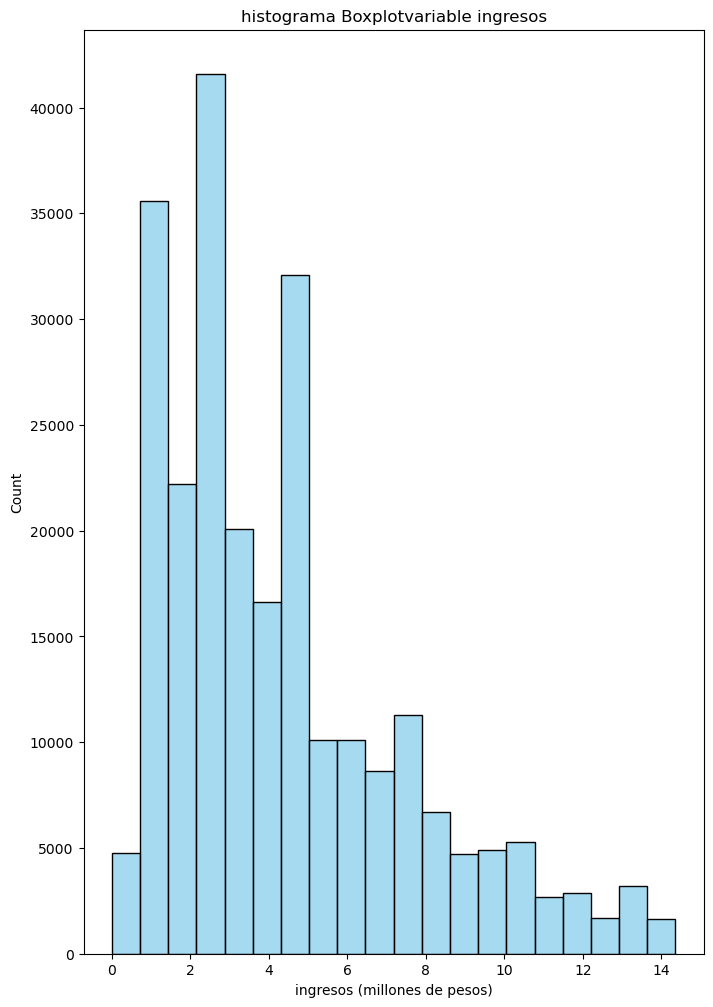

Boxplot variable ingresos


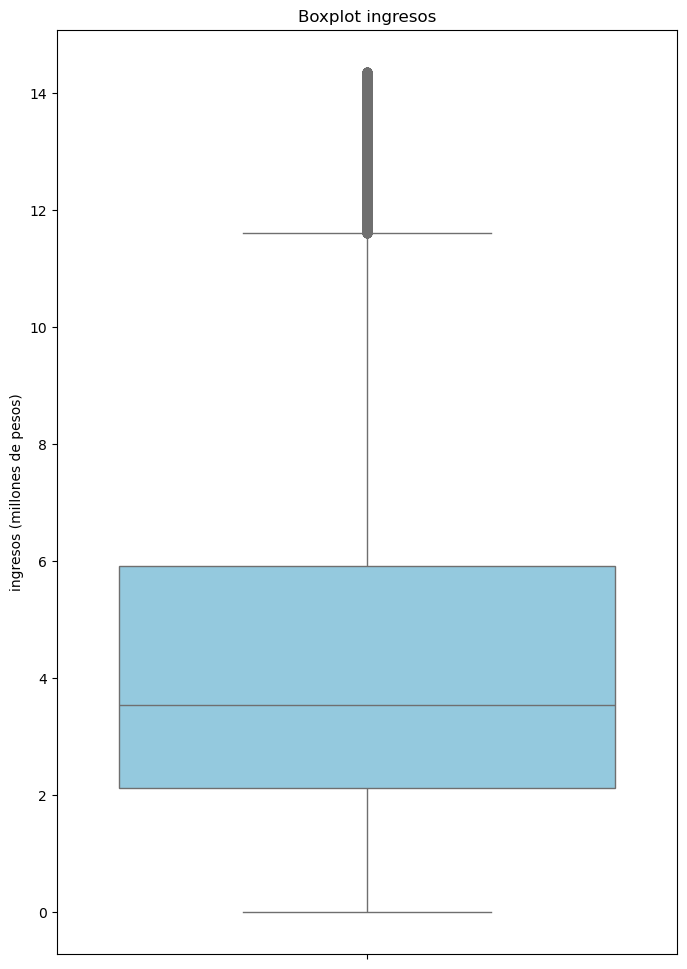

In [47]:
## Volvemos a analizar la variable sin outliers##

print(f'estadisticas descriptivas: {df_sin_outliers['ingresos'].describe()}')

print('_____________________')

print('Histograma variable Ingresos')
plt.figure(figsize=(8,12))
sns.histplot(df_sin_outliers['ingresos'],color='skyblue', bins=20)
plt.title('histograma Boxplotvariable ingresos')
plt.xlabel('ingresos (millones de pesos)')
plt.show()



print('Boxplot variable ingresos')
plt.figure(figsize=(8,12))
sns.boxplot(df_sin_outliers['ingresos'],color='skyblue')
plt.title('Boxplot ingresos')
plt.ylabel('ingresos (millones de pesos)')
plt.show()

In [55]:
## Medidas de la distribucción: Variable ingreso ##

from scipy.stats import skew,kurtosis

print(f'kurtuosis: {kurtosis(df_sin_outliers['ingresos'])}')
print(f'Asimetria: {skew(df_sin_outliers['ingresos'])}')

kurtuosis: 0.6689922751577879
Asimetria: 1.115002019508183


## Interpretación de la Asimetría (Skewness)

El valor de asimetría (skewness) de 1.115 es positivo y mayor que 1, lo que indica que la variable ingreso tiene una asimetría moderada a alta hacia la derecha.

Esto significa que:

La mayoría de los valores de ingresos se concentran en el extremo inferior de la escala.

La "cola" de la distribución se extiende hacia la derecha, lo que indica que hay una cantidad menor de personas con ingresos muy altos.

## Interpretación de la Curtosis (Kurtosis)

El valor de 0.66 en la curtosis significa que la variable ingresos no sigue una distribución normal. Esto se debe a que las observaciones estan mas concentradas al rededor de la media y tiene una mayor dispersión hacia los extremos, esto es tipico de una distribución leptocurtica lo que significa que estos datos estan propensos a presentar valores extremos asi ya se haya dado manejo a los outliers

In [ ]:
# Calcular límites una sola vez
q25 = df_sin_outliers['ingresos'].quantile(0.25)
q75 = df_sin_outliers['ingresos'].quantile(0.75)
mean_val = df_sin_outliers['ingresos'].mean()

categoria_ingresos = []

for i in df_sin_outliers['ingresos']:
    if i > q75:
        categoria_ingresos.append('Ingreso_Alto')
    elif i > mean_val:
        categoria_ingresos.append('Ingreso_Medio_Alto')
    elif i > q25:
        categoria_ingresos.append('Ingreso_Medio')
    else:
        categoria_ingresos.append('Ingreso_Bajo')

df_sin_outliers['Categoria_Ingresos'] = categoria_ingresos


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19316\2839491756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['Categoria_Ingresos'] = categoria_ingresos


In [ ]:
df_sin_outliers['Categoria_Ingresos'].unique() ##  Validar las categorias 

array(['Ingreso_Medio', 'Ingreso_Medio_Alto', 'Ingreso_Bajo',
       'Ingreso_Alto'], dtype=object)

In [60]:
## Proporciones ##

df_sin_outliers['Categoria_Ingresos'].value_counts(normalize=True)*100

Categoria_Ingresos
Ingreso_Medio         32.263137
Ingreso_Bajo          25.000203
Ingreso_Alto          25.000203
Ingreso_Medio_Alto    17.736458
Name: proportion, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19316\2574647738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


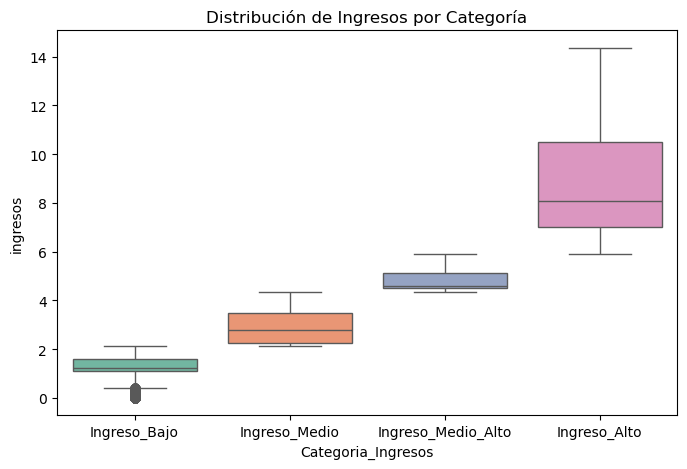

In [62]:
## Grafico de violin ##

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Categoria_Ingresos',
    y='ingresos',
    data=df_sin_outliers,
    order=['Ingreso_Bajo', 'Ingreso_Medio', 'Ingreso_Medio_Alto', 'Ingreso_Alto'], # orden opcional
    palette='Set2'
)
plt.title('Distribución de Ingresos por Categoría')
plt.show()

In [65]:
for i in df_sin_outliers['Categoria_Ingresos'].unique():
    print(f"Categoría: {i}")
    print(df_sin_outliers[df_sin_outliers['Categoria_Ingresos'] == i]['ingresos'].describe())
    print("\n")

Categoría: Ingreso_Medio
count    79608.000000
mean         2.931405
std          0.670245
min          2.115401
25%          2.250000
50%          2.779216
75%          3.500000
max          4.337916
Name: ingresos, dtype: float64


Categoría: Ingreso_Medio_Alto
count    43764.000000
mean         4.840897
std          0.434047
min          4.338000
25%          4.500000
50%          4.582358
75%          5.113070
max          5.913187
Name: ingresos, dtype: float64


Categoría: Ingreso_Bajo
count    61687.000000
mean         1.310028
std          0.452195
min          0.000000
25%          1.125000
50%          1.220000
75%          1.600000
max          2.115240
Name: ingresos, dtype: float64


Categoría: Ingreso_Alto
count    61687.000000
mean         8.824128
std          2.233963
min          5.913250
25%          7.016376
50%          8.075378
75%         10.500000
max         14.357150
Name: ingresos, dtype: float64




## Analisis categorias de ingreso 

El análisis de la distribución de ingresos por categoría, expresados en millones de pesos, evidencia diferencias claras entre los grupos definidos. En la categoría Ingreso_Bajo, la mediana se sitúa cerca de 1,5 millones, con un rango intercuartílico reducido y presencia de valores atípicos hacia niveles muy bajos, lo que refleja una alta concentración de ingresos en torno a la mediana pero con algunos casos extremos. La categoría Ingreso_Medio presenta una mediana cercana a 3 millones, con baja dispersión y sin outliers significativos, mientras que Ingreso_Medio_Alto mantiene una mediana aproximada de 4,8 millones, con gran homogeneidad en los valores. Finalmente, Ingreso_Alto registra la mayor dispersión, con una mediana de 8 millones y un rango que se extiende hasta 14 millones, indicando una composición heterogénea en este segmento. Estos resultados sugieren que las categorías definidas capturan adecuadamente los diferentes niveles de ingreso, aunque los grupos “Bajo” y “Alto” presentan mayor variabilidad interna.

## CONCLUSIONES Y HALLAZGOS

1. La varibale ingreso presenta incialmente outliers muy elevados, se sospecha que dentro de la población de la cooperativa se encuentran categorizados como asociados con (cedula de ciudadania o extranjeria) empresas o personas juridicas, por lo cual se encuentran ingresos maximos hasta mas de 9.000 millones de pesos por mes. Ante esto, se dio tratamiento al problema mediante el uso del rango intercuartilico.

2. Una vez tratados los outliers los ingresos de los asociados a la cooperativa se mueven entre 0 y 14 millones de pesos. con una media de 3.5 millones y una desviación estandar aproximada a 3 millones

3. La distribución de esta variable es asimetrica y presenta patrones de ser leptocurtica, lo que quiere decir que la mayoria de los datos se concentran al rededor de la media y presenta valore extremos aunque se hayan eliminado outliers, en este caso especifico, valores extremos hacia la derecha, lo que quiere decir, asociados con ingresos muy altos y que se desvian significativamente del promedio.

4. Al realizar categorias de ingresos según los cuartiles de la variable se encontró que la mayoria de las observaciones se encuentran en ingresos medios ( mayores al 2.1 millones y menores o iguales a 3.5 millones). Adicionalmente se encontró que la categoria con mayor variabilidad es la de ingresos altos, ya que presenta un valor medio 8 millones y su rango se extiende hasta 14 millones, validando asi que en este segmento se encuentran la mayoria de valores extremos. 

## Implicaciones y Próximos Pasos

Estos hallazgos son fundamentales para la siguiente fase del proyecto, que es predecir la probabilidad de pago. La asimetría positiva de la variable ingresos y la gran variabilidad en el segmento de "ingresos altos" sugieren que los modelos predictivos podrían beneficiarse significativamente de la segmentación. En lugar de tratar a todos los asociados por igual, un próximo paso crucial será crear un modelo predictivo separado para la categoría de ingresos altos, ya que su comportamiento financiero podría ser muy diferente al de los grupos de ingresos medios y bajos. La gran dispersión en el segmento alto indica que el ingreso por sí solo podría no ser suficiente para predecir la probabilidad de pago; se necesitará analizar otras variables (como el historial crediticio o el tipo de asociado) para capturar mejor la variabilidad y mejorar la precisión del modelo en este grupo. Finalmente, la alta concentración de asociados en el segmento de ingresos medios permite enfocar los esfuerzos para crear un modelo robusto y confiable que sirva para la mayoría de la base de clientes de la cooperativa.

In [1]:
## XD